In [1]:
!pip install folium


In [1]:
import folium

In [38]:
gps     = [35.2309931, 129.0801175]
zoom = 13
map = folium.Map(location = gps)
map.save('./pusan.html')


In [39]:
map=folium.Map(location=gps, zoom_start=zoom)
map

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
from plotnine import *
import re

# 지도 표현을 위해
import folium

In [6]:
pwd

'C:\\Project_git\\python_basic'

In [7]:
park = pd.read_csv('./3docker/pd_txtb/data/전국도시공원표준데이터.csv', encoding='euc-kr')
park.shape

(18870, 20)

In [8]:
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN


In [9]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# window한글폰트 설정
plt.rc('font' ,family = 'Malgun Gothic')

plt.rc('axes', unicode_minus= False)

set_matplotlib_formats('retina')

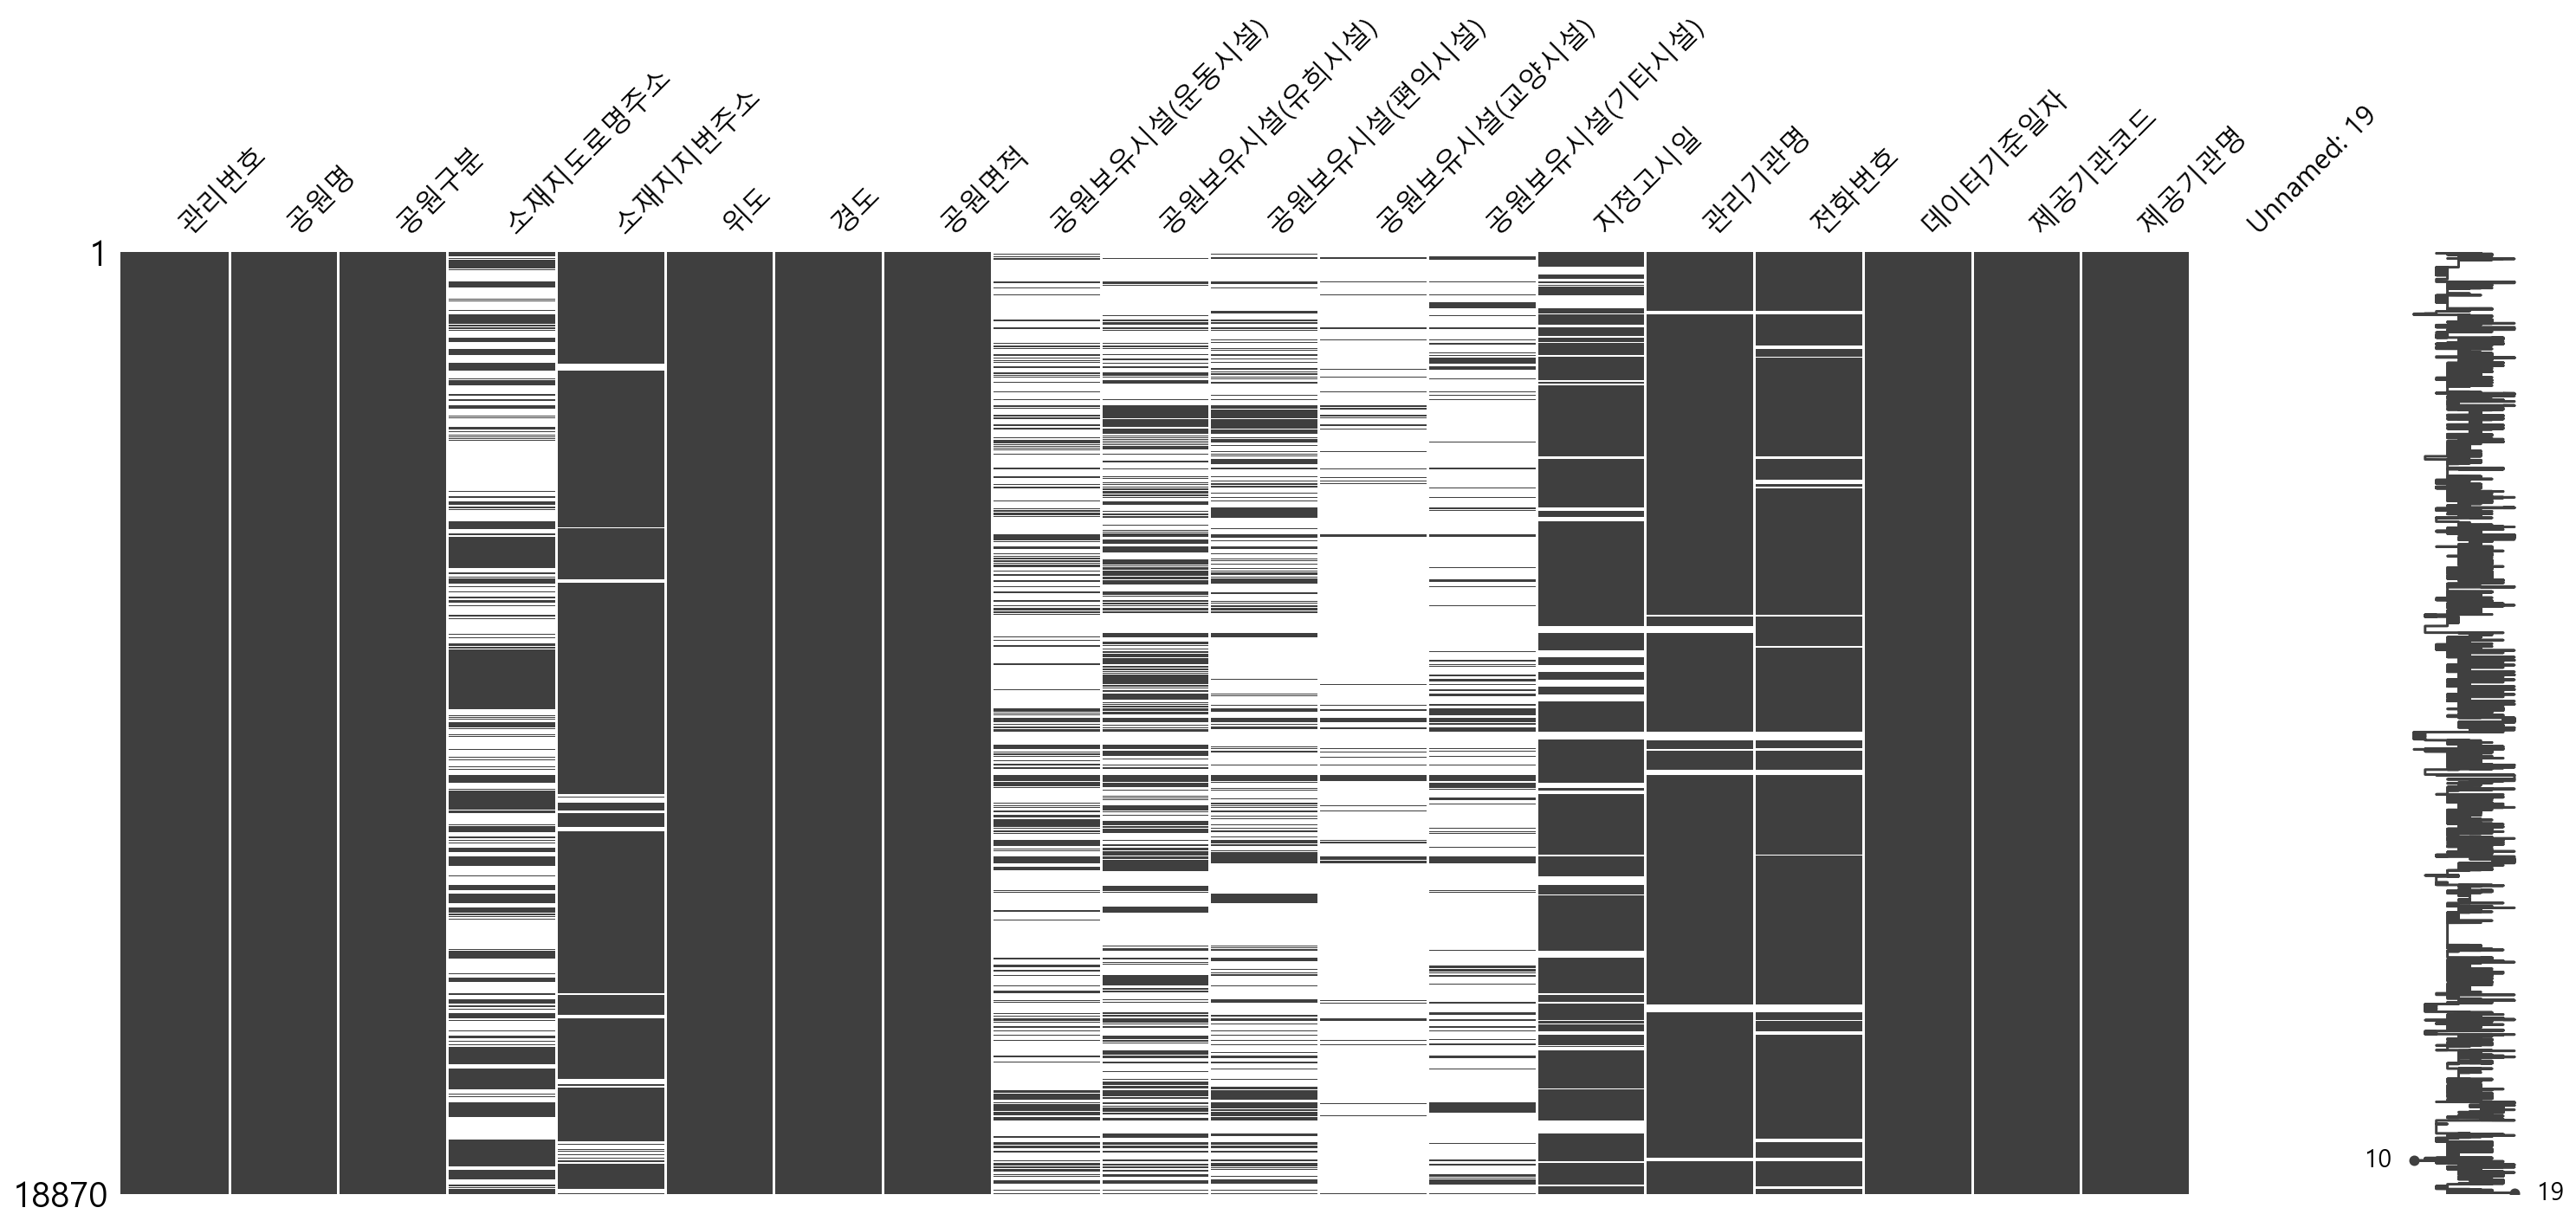

In [10]:
import missingno as msno
msno.matrix(park)

In [21]:
park.columns


Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [23]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', 
           '공원보유시설(편익시설)', '공원보유시설(교양시설)',
           '공원보유시설(기타시설)', '지정고시일', '관리기관명', 
           '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
           'Unnamed: 19'], inplace=True)

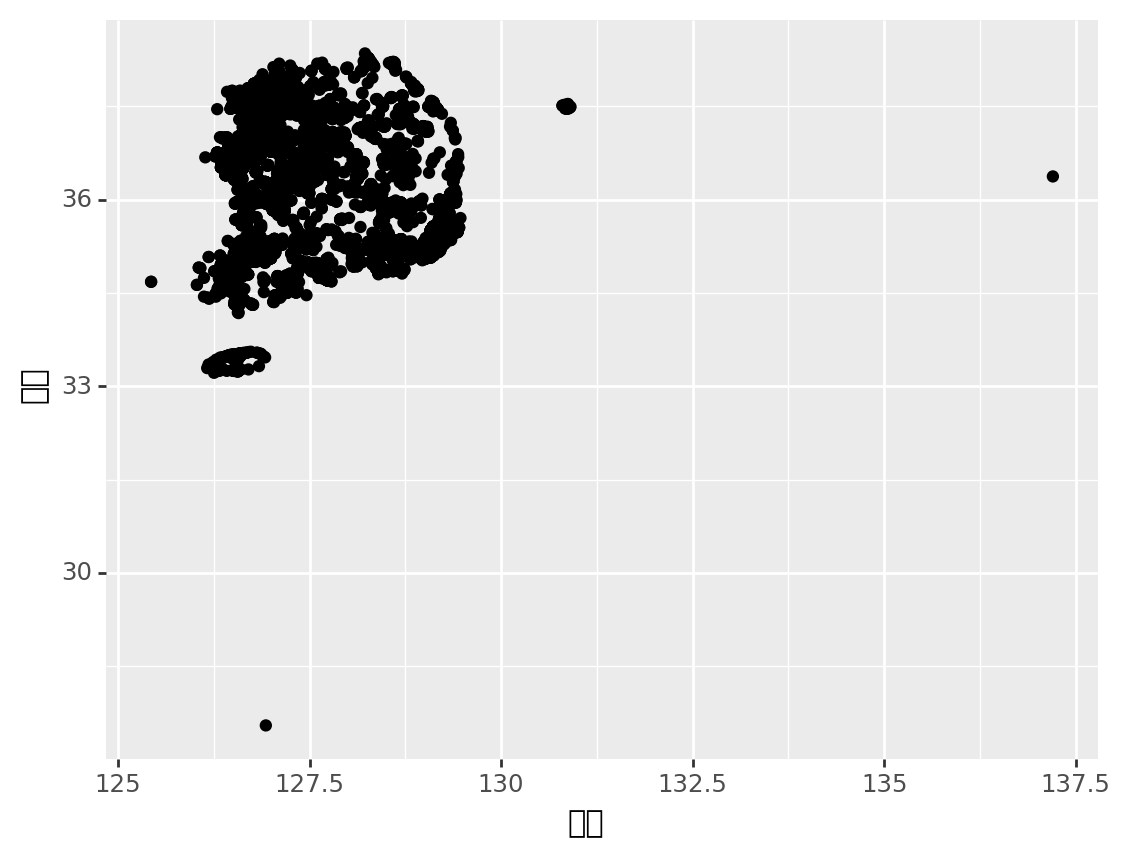

<ggplot: (-9223371877651301636)>

In [24]:
(ggplot(park)
    + aes(x='경도', y = '위도')
    + geom_point()
    + theme(text=element_text(family='NanumGothic')))

In [25]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
dtype: object

In [28]:
# park['공원면적'] = park['공원면적'].str.replace(',','').astype(float)
# park['공원면적'].head()

In [30]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적'], dtype='object')

In [31]:
park['공원면적비율'] = park['공원면적'].apply(lambda x: np.sqrt(x)*0.01)
park['공원면적비율'].head()

0    0.323728
1    0.419524
2    0.388716
3    0.274226
4    0.372156
Name: 공원면적비율, dtype: float64

In [32]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]

In [34]:
park_loc_notnull = park.loc[(park['위도'] > 32)
                           & (park['경도'] < 132) 
                           & park['시도'].notnull()]
park_loc_notnull.shape

(8742, 10)

In [46]:
geo_df = park.loc[park['시도'] == '경기도']
map = folium.Map(location=[geo_df['위도'].mean(),
                          geo_df['경도'].mean()], zoom_start=8)

for n in geo_df.index:
    park_name = \
    geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df['공원면적비율'][n],
        popup=park_name, 
        color = icon_color,
        fill=True,
        fill_color = icon_color
    ).add_to(map)
    
map.save("./g.html")

In [51]:
park.groupby.['시도']

SyntaxError: invalid syntax (<ipython-input-51-20b620c84711>, line 1)